<p style="margin: 0;">
  <!-- Left logo stays on the left -->
  <img src="./Images/logo.png" alt="logo" width="280" style="margin-bottom: 0;" />

  <!-- Right-aligned container -->
  <span style="float: right; text-align: right;">
    <img src="./Images/ai_chemy_logo.png"
         alt="ai_chemy logo"
         width="280"
         style="margin-top: 20px; display: block;" />
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons Licence"
           style="border-width: 0; margin-top: 10px; display: block;"
           src="https://i.creativecommons.org/l/by/4.0/88x31.png"
           title="This work is licensed under a Creative Commons Attribution 4.0 International License." />
    </a>
  </span>
</p>
 
 <h1 style="margin-top: 0; text-align: center;">Session 5: Introdction to ChemBL

 </h1>
ChEMBL is a manually curated database of bioactive molecules with drug-like properties maintained by European Molecular Biology Laboratory – European Bioinformatics Institute. It brings together chemical, bioactivity, and genomic data to aid the translation of genomic information into effective new drugs. For more details on the database and its features please visit the <a href="https://www.ebi.ac.uk/chembl/" target="_blank" rel="noopener">ChEMBL</a> website.
<hr style="border: 1px solid black;">

This project has received funding from the AI for Chemistry: AIchemy Hub (EPSRC grant EP/Y028775/1 and EP/Y028759/1) and educational support from the <a href="https://github.com/Edinburgh-Chemistry-Teaching/Data-driven-chemistry">Data-Driven Chemistry</a>  course at the University of Edinburgh’s School of Chemistry.

Authors: 

- Dr Alex Aziz
- Mr Zhaohui Jiang

Email: a.aziz@mmu.ac.uk
<hr style="border: 1px solid black;">

<span style="font-weight: normal; font-size: 16px;">

In this session you will
    
1. Use the ChEMBL REST API via Python to retrieve and filter bioactivity data.

2. Clean and manipulate datasets with Pandas dropping missing values and removing duplicates.

3. Visualize activity distributions with Matplotlib using histogramsa and boxplots). <br>
</span>

## Introduction
ChEMBL is a comprehensive public database of bioactive molecules, in this session you will learn how to use ChEMBL and explore key concepts used in drug discovery. You will learn how compounds’ biological activities, such as IC₅₀ and Ki, are measured and stored, and how computational tools like QSAR models and APIs allow researchers to analyze chemical and biological data efficiently. You will also highlight important protein targets, which are central to many therapeutic studies.

First an introdcution to some definitions

- **IC₅₀ (Half‑maximal Inhibitory Concentration):**  
  The concentration of a compound required to inhibit 50% of its biological target’s activity.

- **Ki (Inhibition Constant):**  
  A measure of a compound’s binding affinity to an enzyme or receptor.

- **API (Application Programming Interface):**  
  A defined set of protocols and tools that allow software components to communicate.

- **QSAR (Quantitative Structure–Activity Relationship):**  
  Statistical models relating chemical structure features to biological activity.

- **EGFR (Epidermal Growth Factor Receptor):**  
  A protein target commonly implicated in cancer.


# Installing ChEMBL

<p style="font-size: 14px; font-weight: bold;">
Installation if you don't have ChEMBL is straightforward with pip

In [ ]:
pip install chembl_webresource_client

<div class="alert alert-success"><b>🔧 Import the modules: Load the Python packages needed for this tutorial, including new_client from chembl_webresource_client to access ChEMBL data, pandas for data handling, and matplotlib for plotting.</b>

<p style="font-size: 14px; font-weight: bold;">
1. Import new_client.target

In [2]:
from chembl_webresource_client.new_client import new_client 
# In the case of the ChEMBL client library:
# 1.The top-level package is named chembl_webresource_client.
# 2.Inside that package, there is a file (module) called new_client.py which defines the factory function new_client.

<p style="font-size: 14px; font-weight: bold;">
2. Import Pandas: Converts API records into DataFrames

In [5]:
import pandas as pd

<p style="font-size: 14px; font-weight: bold;">
3. Import matplotlib for plotting

In [8]:
import matplotlib.pyplot as plt

In [9]:
import numpy as np

<p style="font-size: 14px; font-weight: bold;">
# Retrieve activity data

<div class="alert alert-success"><b>🔧 Find target_chembl_id and retrieve activity data.</b>

**1. Retrieve the target client to query target endpoint**<br>
The target endpoint is the part of the API that provides information about biological targets like proteins or receptors.

In [14]:
# Create a target client
target_client = new_client.target
# new_client provides subclients like target, activity, and molecule. 
# A target in ChEMBL is the biological entity (e.g., a protein or receptor) that a compound interacts with, such as EGFR.


**2. Use filter to match by field pref_name**
In ChEMBL, each target is returned as a dictionary containing multiple pieces of information. In this example, the target dictionary is stored in hiv_pr. The key pref_name in hiv_pr stores the preferred, human-readable name of the target, which is "Human immunodeficiency virus type 1 protease". Other details like target_type, organism, and target_chembl_id are also included, but pref_name is the main name used for display and reference in your code.

In [17]:
# Input the name of protease
results = target_client.filter(pref_name="Human immunodeficiency virus type 1 protease") 

hiv_pr = results[0] # the index start from 0
target_name = hiv_pr['pref_name']

**3. Print the target name and ChEMBL ID**

In [28]:
# Print the results
print("Target name:", hiv_pr['pref_name'])
print("Target ChEMBL ID:", hiv_pr['target_chembl_id'])

Target name: Human immunodeficiency virus type 1 protease
Target ChEMBL ID: CHEMBL243


**4. Extract the target_chembl_id field**

In [31]:
# Extracts the target_chembl_id field from the hiv_pr object and assign it to target_id.
target_id = hiv_pr['target_chembl_id'] 

**5. Retrieve the activity client from your API client (new_client)**
The activity client gives access to ChEMBL’s activity endpoint, allowing you to query bioactivity data such as IC₅₀, Ki, or EC₅₀ values for compounds against specific targets.

In [34]:
activity_client = new_client.activity 

**6. Retrive IC₅₀ values (in nM) for a specific target.**

In [37]:
# Retrive and fliter IC50 values for CHEMBL243 and output in raw 
raw = activity_client.filter( # raw is often an iterable or generator of results.
    target_chembl_id="CHEMBL243", # Queries the activity endpoint for records matching the given filters: target ID CHEMBL243.
    standard_type="IC50",
    standard_units="nM"
)

**7. Convert the iterable raw into a Python list**

In [40]:
# In order to easier to construct a Pandas DataFrame from a list of dicts.
records = list(raw)

**8. Build a Pandas DataFrame from the list of records**

In [43]:
# Builds a Pandas DataFrame and Print the records amount
df = pd.DataFrame(records)
print(f"Total records fetched: {len(df)}")

Total records fetched: 3526


**9. Clean the data using Pandas**

In [49]:
# 1.Remove rows where standard_value is missing
# 2.Remove duplicate rows based on molecule_chembl_id
df = df.dropna(subset=['standard_value']).drop_duplicates(['molecule_chembl_id'])  

<div class="alert alert-success"><b>🔧 Plot and visualize the IC50 distribution.</b>

**1. Convert to values**

In [56]:
#This converts df['standard_value'] to a float type and stores it in values, ensuring the data can be used for calculations or plotting.
values = df['standard_value'].astype(float)
values = np.log10(values)

**2. Visualize as a histogram**

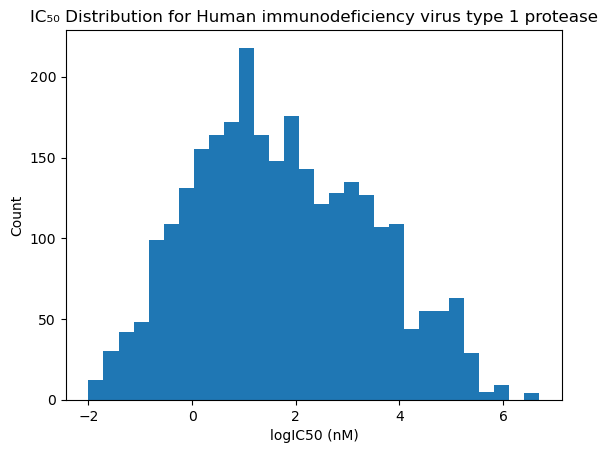

In [61]:
# Elements for a histogram needed,  x label, y label, title
#The bins=30 argument divides the data range into 30 intervals, with each bin counting how many values fall into that range. 
#More bins give a more detailed view of the distribution, while fewer bins give a broader overview.

plt.hist(values, bins=30) 
plt.xlabel('logIC50 (nM)')
plt.ylabel('Count')
plt.title(f'IC₅₀ Distribution for {target_name}')
plt.savefig(f"{target_name.lower()}_ic50_histogram.png", dpi=300, bbox_inches='tight')
plt.show()

<div class="alert alert-success"><b>🔧 Task 1: Find the target_chembl_id for SARS-CoV-2 (Severe Acute Respiratory Syndrome Coronavirus 2 Main Protease), and retrieve activity data for IC50.</b>

<div class="alert alert-success"><b>🔧 Task 2: Convert to Dataframe and clean the data, visualize and plot the IC50 distribution.</b>


<div class="alert alert-success">
  <b>🔧 Task 3:</b>
  <ol>
    <li>Choose a protein target of interest (excluding HIV-1 or SARS-CoV-2 Main Protease) and find its <code>target_chembl_id</code> via the ChEMBL web interface or API.</li>
    <li>Retrieve all IC₅₀ (nM) records for the chosen target using the <code>chembl_webresource_client</code>.</li>
    <li>Convert the results to a Pandas DataFrame, including:
      <ul>
        <li>Drop rows with missing <code>standard_value</code> (IC₅₀).</li>
        <li>Remove duplicate entries based on <code>molecule_chembl_id</code>.</li>
      </ul>
    </li>
    <li>Extract and rename columns to <code>ChEMBL_ID</code>, <code>SMILES</code>, and <code>IC50_nM</code>.</li>
    <li>Visualize the IC₅₀ value distribution and print the top 10 potential compounds.</li>
  </ol>
</div>


<h1 style="margin-top: 0; text-align: center;">End of Session</h1>